### Mô tả bộ dữ liệu
* **Link tải** : https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
* Bộ dữ liệu dùng trong việc dự đoán xem một người nào đó có nguy cơ mắc bệnh đột quỵ hay không.
* **Bộ dữ liệu gồm 12 cột**:
    * **Cột id** : Chưa mã người bệnh
    * **Cột gender** : chứa thông tin về giới tính của một người.
    * **Cột age** : độ tuổi của người bệnh.
    * **Cột hypertension** : Hội chứng cao huyết áp.
    * **Cột heart_disease** : Bệnh đau tim.
    * **Cột ever_married** : Trạng thái hôn nhân.
    * **Cột work_type** : loại công việc.
    * **Cột Residence_type** : loại nhà ở.
    * **Cột avg_glucose_level** : mức độ glucozo
    * **Cột bmi** : Chỉ số BMI (Body Mass Index) hay còn gọi là chỉ số khối cơ thể, chỉ số thể trọng, là một công cụ thường được sử dụng để đo lượng mỡ trong cơ thể. 
    * **Cột smoking status** : Tình trạng hút thuốc.
    * **Cột stroke** : xem người đó có nguy cơ bị đột quỵ hay không.


In [2]:
# !wget https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/download

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('/content/stroke.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Thông tin về kiểu dữ liệu

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


### Kiểm tra số lượng mẫu dữ liệu

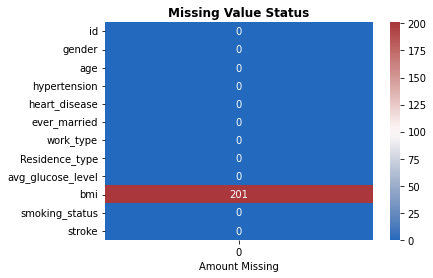

In [5]:
col = df.columns
c = df.count()
# plt.barh(col,c)
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()
# ta thấy ở cột bmi có một số mẫu đã bị thiếu ta sẽ loại bỏ các mẫu dữ liệu đó

#### **Kết luận :** Bộ dữ liệu chứa 201 mẫu thiếu giá trị.Chúng ta cần loại bỏ các mẫu đó ra khỏi tập dataset

<BarContainer object of 12 artists>

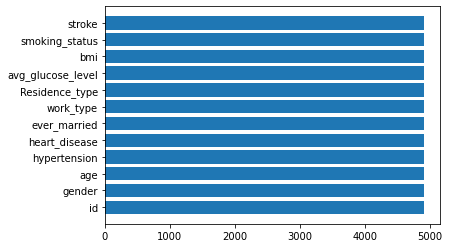

In [6]:
# Sau khi loại bỏ những mẫu dữ liệu bị thiếu
df = df.dropna()
plt.barh(col,df.count())

<BarContainer object of 2 artists>

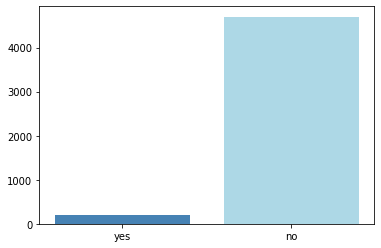

In [7]:
t = df[df['stroke'] == 1]
f = df[df['stroke'] == 0]
plt.bar(['yes','no'],[t.count()[0],f.count()[0]],color=('steelblue','lightblue'))
# Ta thấy được bộ dữ liệu khá mất cân bằng 

#### **Kết luận :** Qua biểu đồ trên chúng ta thấy được bộ dữ liệu đang mất cân bằng

<BarContainer object of 2 artists>

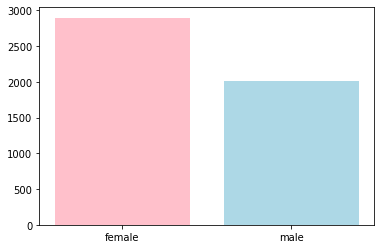

In [8]:
f = df[df['gender'] == 'Female']
m = df[(df['gender'] == 'Male')]
plt.bar(['female','male'],[f.count()[0],m.count()[0]],color=('pink','lightblue'))

#### **Kết luận :**  Ta thấy số lượng nữ giới chiếm số lượng lớn hơn nam giới.

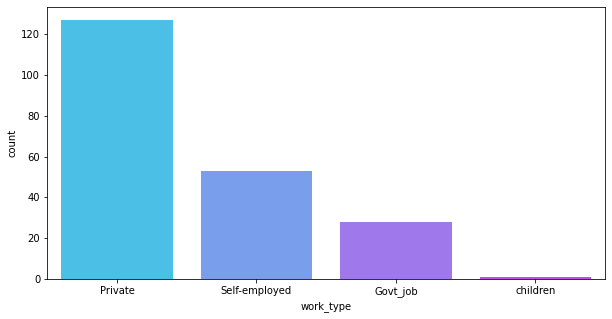

In [9]:
stroke = df[df['stroke'] == 1]
plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='work_type',palette='cool');

**Kết luận:** Người làm công việc private dễ mắc đột quỵ

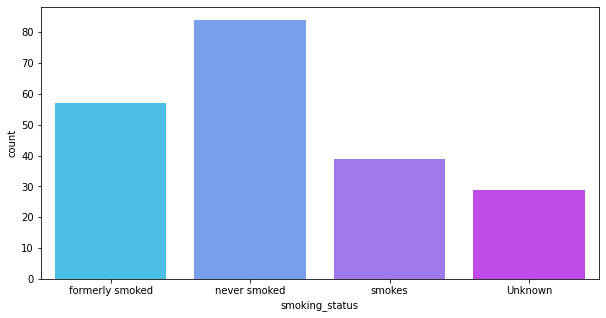

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='smoking_status',palette='cool');

**Kết luận :** Những người hút thuốc và trước đây từng hút thuốc có nguy cơ đột quỵ

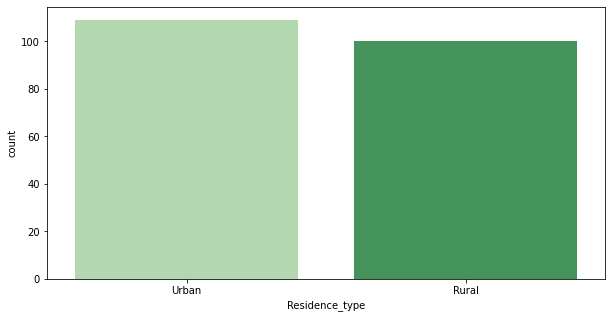

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='Residence_type',palette='Greens');

**Kết luận :** Loại hình cư trú không liên quan đến nguy cơ bị đột quỵ

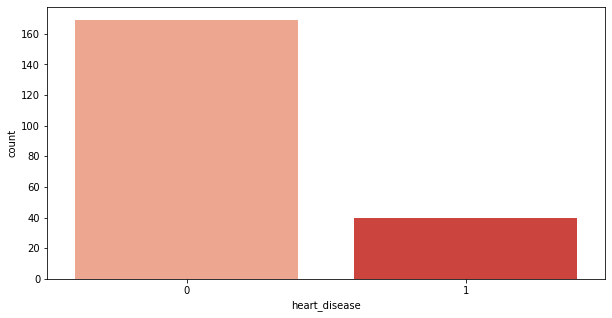

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='heart_disease',palette='Reds');

**Kết luận :** Những người trước đây chưa từng mắc bệnh tim có nguy cơ đột quỵ cao hơn

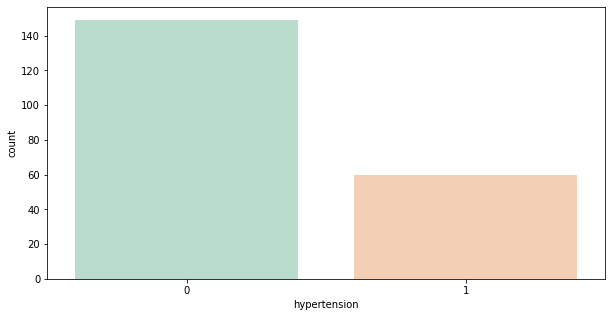

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='hypertension',palette='Pastel2');

**Kết luận :** Nhiều người bị đột quỵ do tăng huyết áp

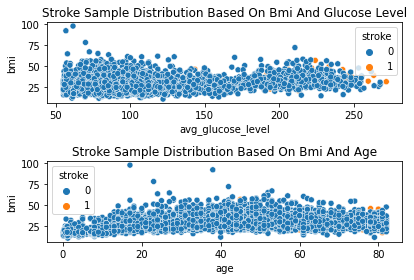

In [14]:
plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=df['avg_glucose_level'],y=df['bmi'],hue=df['stroke'])
plt.subplot(2,1,2)
plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['stroke'])
plt.tight_layout()
plt.show()

#### **Kết luận :** Chúng ta thấy được những người mắc đột quỵ có mức bmi dưới 60 và kèm theo đó là tuổi già

<BarContainer object of 2 artists>

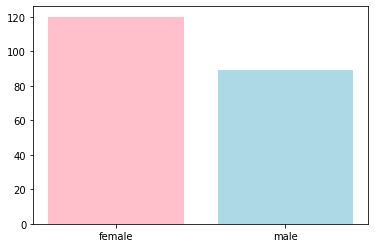

In [15]:
female = df[(df['gender'] == 'Female') & (df['stroke'] == 1)]
male = df[(df['gender'] == 'Male') & (df['stroke'] == 1)]
plt.bar(['female','male'],[female.count()[0],male.count()[0]],color=('pink','lightblue'))

**Kết luận :** Nữ giới thì có nguy cơ đột quỵ cao hơn nam giới

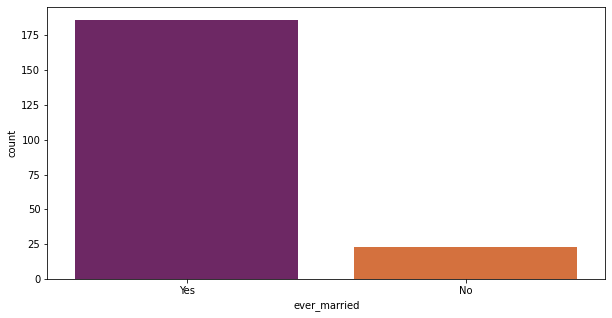

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='ever_married',palette='inferno');

**Kết luận :** Người đã kết hôn thì có nguy cơ đột quỵ cao hơn

### **Đánh giá  dữ liệu :**
Ta thấy dữ liệu có những cột dư thừa không liên quan lắm đến bệnh đột quy.Như việc ở nông thôn hay thành thị thì nó chả liên quan đến việc một người có nguy cơ đột quỵ hay không.
#### Kêt luận :
Chúng ta sẽ tiến hành loại bỏ những cột không cần thiết

In [17]:
df.drop(['Residence_type','id'], axis=1, inplace=True)
# Dữ liệu sau khi xóa các cột không cần thiết
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,166.29,25.6,formerly smoked,0


In [18]:
# Để có thể huấn luyện ta cần đưa các cột về kiểu dữ liệu là số
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x = pd.get_dummies(x,columns=['smoking_status','gender','ever_married','work_type'])
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,67.0,0,1,228.69,36.6,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,80.0,0,1,105.92,32.5,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.4,0,0,0,1,1,0,0,0,1,0,0,1,0,0
4,79.0,1,0,174.12,24.0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,1,0,0,0,1,0,0,1,0,0,0,0,0,1
5106,81.0,0,0,125.20,40.0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,1,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,0,1,0,0,1,0,0,1,0,0


### Chia dữ liệu huấn luyện

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
acc_score = []
k = 5
kf = KFold(n_splits=k,shuffle=True)
def Score(model,X,y):
  scale = StandardScaler()
  for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    X_train = scale.fit_transform(X_train)
    model.fit(X_train,y_train)
    X_test = scale.fit_transform(X_test)
    pred_values = model.predict(X_test)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
  return sum(acc_score)/len(acc_score),acc_score

### Cài đặt mô hình XGBoost

* **Mô hình chưa được điều chỉnh tham số**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
models = []
models.append(['XGBClassifier',XGBClassifier()])
models.append(['Logistic Regression',LogisticRegression()])
models.append(['SVM',svm.SVC()])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['DecisionTree',DecisionTreeClassifier()])
models.append(['RandomForest',RandomForestClassifier()])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [22]:
def allScore():
  names = []
  scores = []
  for i in range(len(models)):
      names.append(models[i][0])
      model = models[i][1]
      model.fit(X_train,y_train)
      y_pred = model.predict(X_test)
      scores.append(accuracy_score(y_pred,y_test))
  return names,scores
col_n,col_s = allScore()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [23]:
data = {
    'Algorithm' : col_n,
    'Score' : col_s
}
t = pd.DataFrame(data)
t

,Algorithm,Score
0,XGBClassifier,0.956212
1,Logistic Regression,0.956212
2,SVM,0.956212
3,KNeigbors,0.949084
4,DecisionTree,0.905295
5,RandomForest,0.954175
6,AdaBoostClassifier,0.956212


* **Điều chỉnh tham số mô hình :**

In [39]:
# Tham so dung de tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params = {
    'num_round' : [0,1000,2000,3000,4000],
    'min_child_weight' : [0,20,30,50,120],
    'eta' : [i/10 for i in range(0,6)],
    'subsample' : [i/10 for i in range(5,11)]
}
def hyperParameterTuningGrid(X_train, y_train,params):
    xgb_model = XGBClassifier()
    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = params,
                           scoring='neg_mean_squared_error', 
                   verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_
best_pg = hyperParameterTuningGrid(X_train,y_train,params)
best_pg

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


{'eta': 0.0, 'min_child_weight': 0, 'num_round': 0, 'subsample': 1.0}

In [40]:
def hyperParameterTuningRandom(X_train,y_train,params):
    xgb_model = XGBClassifier()

    rsearch = RandomizedSearchCV(estimator=xgb_model,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

    rsearch.fit(X_train,y_train)

    return rsearch.best_params_
best_pr = hyperParameterTuningRandom(X_train,y_train,params)
best_pr

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'eta': 0.4, 'min_child_weight': 50, 'num_round': 1000, 'subsample': 0.6}

In [49]:
# Sử dụng GridSearch
model_tg = XGBClassifier(
    min_child_weight = best_pg['min_child_weight'],
    eta = best_pg['eta'],
    num_round = best_pg['num_round']
)
model_tr = XGBClassifier(
    min_child_weight = best_pr['min_child_weight'],
    eta = best_pr['eta'],
    num_round = best_pr['num_round']
)
score_tg,_ = Score(model_tg,x,y)
score_tr,_ = Score(model_tr,x,y)
print('GridSearch : {}'.format(score_tg))
print('RandomSearch : {}'.format(score_tr))

GridSearch : 0.9570804872716343
RandomSearch : 0.9571049830396975


In [44]:
# Sau khi điều chỉnh một vài tham số thì độ chính xác đã được gia tắng
data = {
    'XGBoost' : ['Default','Tuning GridSearch','Tuning RandomSearch'],
    'Score' : [col_s[0],score_tg,score_tr]
}
t = pd.DataFrame(data)
t

,XGBoost,Score
0,Default,0.956212
1,Tuning GridSearch,0.957041
2,Tuning RandomSearch,0.957079
